# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# **Generating the data**

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
# Generating synthetic data
num_users = 1000
# Simulate user IDs
user_ids = np.arange(1, num_users + 1)
# Randomly assign users to control (A) and treatment (B) groups
groups = np.random.choice(['A', 'B'], size=num_users, p=[0.5, 0.5])

In [3]:
# Control group (A) has a mean of 120 seconds, treatment group (B) has a mean of 150 seconds
time_spent = np.where(groups == 'A',
                      np.random.normal(120, 30, num_users),
                      np.random.normal(150, 35, num_users))
time_spent = np.clip(time_spent, 0, None)  # Ensure no negative values

In [4]:
# Control group (A) has a 20% CTR, treatment group (B) has a 25% CTR
clicked = np.where(groups == 'A',
                   np.random.binomial(1, 0.2, num_users),
                   np.random.binomial(1, 0.25, num_users))

In [5]:
# Control group (A) has a 10% conversion rate, treatment group (B) has a 15% conversion rate
converted = np.where(groups == 'A',
                     np.random.binomial(1, 0.1, num_users),
                     np.random.binomial(1, 0.15, num_users))

In [6]:
# Creating DataFrame for the Analysis
data = pd.DataFrame({
    'User_Id': user_ids,
    'Group': groups,
    'Time_Spent': time_spent,
    'Clicked': clicked,
    'Converted': converted
})

In [7]:
# Save the DataFrame to CSV
data.to_csv('ab_test_data.csv', index=False)

In [8]:
# Display the first few rows
data.head()

,User_Id,Group,Time_Spent,Clicked,Converted
0,1,A,125.331030,0,0
1,2,B,147.091305,0,1
2,3,B,97.334787,0,1
3,4,B,176.601959,0,0
4,5,A,136.793713,0,0


In [9]:
#Check the shape of dataset
print(data.shape)
print("The dataset has",data.shape[0], "rows")
print("The dataset has",data.shape[1], "colunms")

(1000, 5)
The dataset has 1000 rows
The dataset has 5 colunms


In [10]:
# Check the size of the column "Group"
print(data['Group'].value_counts())

Group
A    503
B    497
Name: count, dtype: int64


In [11]:
# DataSet info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_Id     1000 non-null   int64  
 1   Group       1000 non-null   object 
 2   Time_Spent  1000 non-null   float64
 3   Clicked     1000 non-null   int64  
 4   Converted   1000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [12]:
# Summary statistics
data.describe()

,User_Id,Time_Spent,Clicked,Converted
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,137.572715,0.226000,0.134000
std,288.819436,34.157429,0.418448,0.340823
min,1.000000,34.543721,0.000000,0.000000
25%,250.750000,113.988943,0.000000,0.000000
50%,500.500000,135.576646,0.000000,0.000000
75%,750.250000,162.760801,0.000000,0.000000
max,1000.000000,246.588101,1.000000,1.000000


In [13]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the total number of missing values across all columns
print(int(missing_values.sum()))  # Sum the values in the Series before converting to int


# Check if there is any duplicated values in DataSet
duplicate_values = data.duplicated().sum()
print(int(duplicate_values))

0
0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

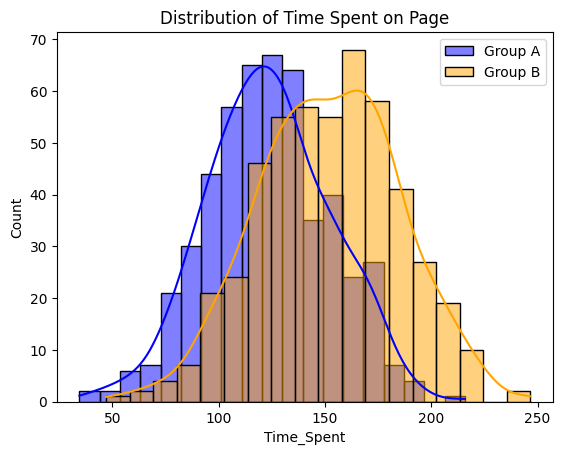

In [15]:
sns.histplot(data[data['Group'] == 'A']['Time_Spent'], label='Group A', color='blue', kde=True)
sns.histplot(data[data['Group'] == 'B']['Time_Spent'], label='Group B', color='orange', kde=True)
plt.legend()
plt.title('Distribution of Time Spent on Page')
plt.show()

In [16]:
conversion_rates = data.groupby('Group')['Converted'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 Group
A    0.117296
B    0.150905
Name: Converted, dtype: float64


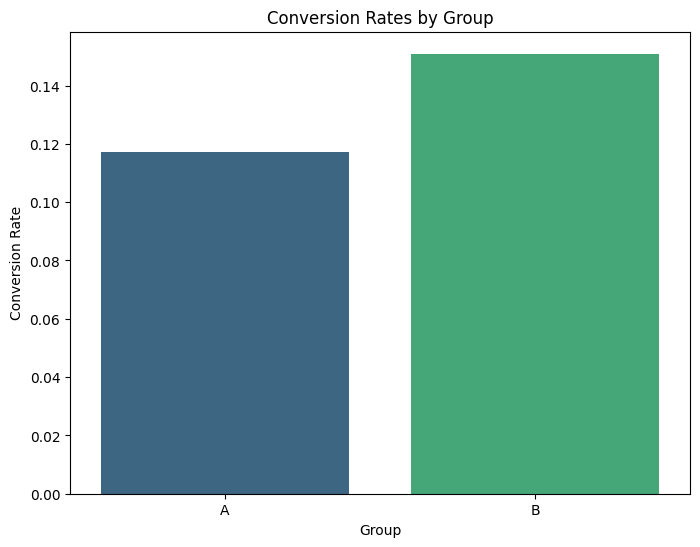

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette='viridis')
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()

In [18]:
time_spent_A = data[data['Group'] == 'A']['Time_Spent']
time_spent_B = data[data['Group'] == 'B']['Time_Spent']

t_statistic, p_value = stats.ttest_ind(time_spent_A, time_spent_B)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -14.413528707791391, P-value: 6.3220609709613525e-43


In [19]:
ctr_table = pd.crosstab(data['Group'], data['Clicked'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(ctr_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 9.310702750641683, P-value: 0.002278190821467465


In [20]:
conversion_table = pd.crosstab(data['Group'], data['Converted'])
chi2_stat, p_value, _, _ = stats.chi2_contingency(conversion_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 2.152419840014864, P-value: 0.14234538454174742


In [21]:
landing_page_conversion = data.groupby('Group')['Converted'].mean()
print("Landing Page Conversion Rates:\n", landing_page_conversion)
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(data['Group'], data['Converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Landing Page:\n p-value = {p}")

Landing Page Conversion Rates:
 Group
A    0.117296
B    0.150905
Name: Converted, dtype: float64
Chi-square test for Landing Page:
 p-value = 0.14234538454174742


In [22]:
button_ctr = data.groupby('Group')['Clicked'].mean()
print("Button Click-Through Rates:\n", button_ctr)
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(data['Group'], data['Clicked'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Button:\n p-value = {p}")

Button Click-Through Rates:
 Group
A    0.184891
B    0.267606
Name: Clicked, dtype: float64
Chi-square test for Button:
 p-value = 0.002278190821467465


In [23]:
headline_time_spent = data.groupby('Group')['Time_Spent'].mean()
print("Average Time Spent on Page by Group:\n", headline_time_spent)
# Perform a t-test to check if the difference is significant
group_A_time = data[data['Group'] == 'A']['Time_Spent']
group_B_time = data[data['Group'] == 'B']['Time_Spent']
t_stat, p = stats.ttest_ind(group_A_time, group_B_time)
print(f"T-test for Headline:\n p-value = {p}")

Average Time Spent on Page by Group:
 Group
A    123.486192
B    151.829298
Name: Time_Spent, dtype: float64
T-test for Headline:
 p-value = 6.3220609709613525e-43


In [24]:
# Compare conversion rates between groups (similar to landing page testing)
image_conversion = data.groupby('Group')['Converted'].mean()
print("Image Conversion Rates:\n", image_conversion)
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(data['Group'], data['Converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Image:\n p-value = {p}")

Image Conversion Rates:
 Group
A    0.117296
B    0.150905
Name: Converted, dtype: float64
Chi-square test for Image:
 p-value = 0.14234538454174742


In [25]:
pricing_conversion = data.groupby('Group')['Converted'].mean()
print("Pricing Conversion Rates:\n", pricing_conversion)
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(data['Group'], data['Converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Pricing:\n p-value = {p}")

Pricing Conversion Rates:
 Group
A    0.117296
B    0.150905
Name: Converted, dtype: float64
Chi-square test for Pricing:
 p-value = 0.14234538454174742


In [26]:
data['time_spent_bin'] = pd.qcut(data['Time_Spent'], q=4)  # Bin time spent into quartiles
time_spent_conversion = data.groupby('time_spent_bin')['Converted'].mean()
print("Conversion Rates by Time Spent Quartiles:\n", time_spent_conversion)
# Perform a chi-square test to check if the difference is significant
contingency_table = pd.crosstab(data['time_spent_bin'], data['Converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square test for Time Spent vs. Conversion:\n p-value = {p}")

Conversion Rates by Time Spent Quartiles:
 time_spent_bin
(34.543, 113.989]     0.104
(113.989, 135.577]    0.124
(135.577, 162.761]    0.180
(162.761, 246.588]    0.128
Name: Converted, dtype: float64
Chi-square test for Time Spent vs. Conversion:
 p-value = 0.07888268966776012
